# Linear Regression

## Introduction to Linear Regression

The purpose of machine learning is often to create a model that explains some real-world data, so that we can predict what may happen next, with different inputs.

The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression.

We often want to find lines to fit data, so that we can predict unknowns. For example:

* The market price of a house vs. the square footage of a house. Can we predict how much a house will sell for, given its size?
* The tax rate of a country vs. its GDP. Can we predict taxation based on a country’s GDP?
* The amount of chips left in the bag vs. number of chips taken. Can we predict how much longer this bag of chips will last, given how much people at this party have been eating?

Imagine that we had this set of weights plotted against heights of a large set of professional baseball players:

<img src="https://content.codecademy.com/programs/data-science-path/linear_regression/weight_height.png" alt="heights vs weights"  width=500 style="background-color:white;"></img>

To create a linear model to explain this data, we might draw this line:

<img src="https://content.codecademy.com/programs/data-science-path/linear_regression/weight_height_line.png" alt="heights vs weights with regression"  width=500 style="background-color:white;"></img>

Now, if we wanted to estimate the weight of a player with a height of 73 inches, we could estimate that it is around 143 pounds.

A line is a rough approximation, but it allows us the ability to explain and predict variables that have a linear relationship with each other. In the rest of the lesson, we will learn how to perform Linear Regression.

***
### Exercise

1. Run the code in the cell below.

    This shows Sandra's lemonade stand's revenue over its first 12 months of being open.

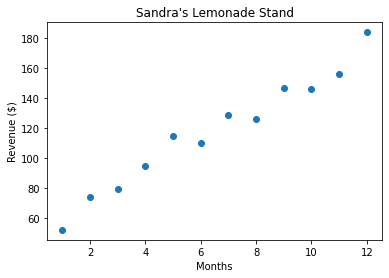

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

2. From eyeballing the graph, what do you think the revenue in month 13 would be?

    Enter your approximate answer as an integer in a variable called `month_13`.

In [2]:
month_13 = 195

***

## Points and Lines

In the last exercise, you were probably able to make a rough estimate about the next data point for Sandra's lemonade stand without thinking too hard about it. For our program to make the same level of guess, we have to determine what a line would look like through those data points.

A line is determined by its slope and its intercept. In other words, for each point $y$ on a line we can say:

$$
y = mx + b
$$

where $m$ is the slope, and $b$ is the intercept. $y$ is a given point on the y-axis, and it corresponds to a given $x$ on the x-axis.

The slope is a measure of how steep the line is, while the intercept is a measure of where the line hits the y-axis.

When we perform Linear Regression, the goal is to get the "best" $m$ and $b$ for our data. We will determine what "best" means in the next exercises.

***
### Exercise

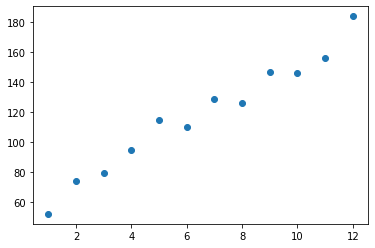

In [3]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 8
#intercept:
b = 40

plt.plot(months, revenue, "o")

plt.show()

1. We have provided a slope, `m`, and an intercept, `b`, that seems to describe the revenue data you have been given.

    Create a new list, `y`, that has every element in `months`, multiplied by `m` and added to `b`.

    A list comprehension is probably the easiest way to do this!

In [4]:
y = [m * x + b for x in months]

2. Plot the `y` values against `months` as a line on top of the scatterplot that was plotted with the line `plt.plot(months, revenue, "o")`.

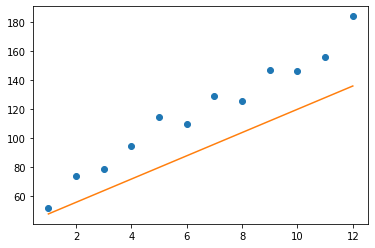

In [5]:
plt.plot(months, revenue, "o")
plt.plot(months, y)
plt.show()

3. Change `m` and `b` to the values that you think match the data the best.

    What does the slope look like it should be? And the intercept?

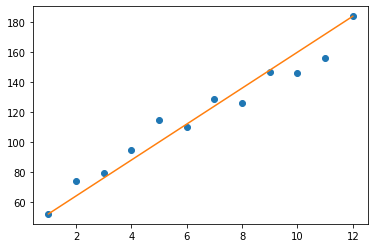

In [6]:
#slope:
m = 12
#intercept:
b = 40

y = [m * x + b for x in months]
plt.plot(months, revenue, "o")
plt.plot(months, y)
plt.show()

## Loss

When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best *fit* is.

For each data point, we calculate **loss**, a number that measures how bad the model's (in this case, the line's) prediction was. You may have seen this being referred to as error.

We can think about loss as the squared distance from the point to the line. We do the squared distance (instead of just the distance) so that points above and below the line both contribute to total loss in the same way:

<img src="https://content.codecademy.com/programs/machine-learning/linear-regression/points.svg" alt="loss"  width=500 style="background-color:white;"></img>

In this example:

* For point A, the squared distance is `9` ($3^2$)
* For point B, the squared distance is `1` ($1^2$)

So the total loss, with this model, is 10. If we found a line that had less loss than 10, that line would be a better model for this data.

***
### Exercise

In [7]:
x = [1, 2, 3]
y = [5, 1, 3]

# y = x
m1 = 1
b1 = 0

# y = 0.5x + 1
m2 = 0.5
b2 = 1

1. We have three points, $(1, 5)$, $(2, 1)$, and $(3, 3)$. We are trying to find a line that produces lowest loss.

    We have provided you the list of x-values, `x`, and y-values, `y`, for these points.

    Find the y-values that the line with weights m1 and b1 would predict for the x-values given. Store these in a list called `y_predicted1`.

In [8]:
y_predicted1 = [m1 * x + b1 for x in x]

2. Find the y values that the line with weights `m2` and `b2` would predict for the x-values given. Store these in a list called `y_predicted2`.

In [9]:
y_predicted2 = [m2 * x + b2 for x in x]

3. Create a variable called `total_loss1` and set it equal to zero.

    Then, find the sum of the squared distance between the actual y-values of the points and the `y_predicted1` values by looping through the list:

    * Calculating the difference between `y` and `y_predicted1`
    * Squaring the difference
    * Adding it to `total_loss1`

In [10]:
total_loss1 = sum([(y - y_pred)**2 for y, y_pred in zip(y, y_predicted1)])
total_loss1

17

4. Create a variable called `total_loss2` and set it equal to zero.

    Find the sum of the squared distance between the actual y-values of the points and the `y_predicted2` values by looping through the list:

    * Calculating the difference between `y` and `y_predicted2`
    * Squaring the difference
    * Adding it to `total_loss2`

In [11]:
total_loss2 = sum([(y - y_pred)**2 for y, y_pred in zip(y, y_predicted2)])
total_loss2

13.5

5. Print out `total_loss1` and `total_loss2`. Out of these two lines, which would you use to model the points?

    Create a variable called `better_fit` and assign it to `1` if line 1 fits the data better and `2` if line 2 fits the data better.

In [12]:
better_fit = 2

## Minimizing Loss

The goal of a linear regression model is to find the slope and intercept pair that minimizes loss on average across all of the data.

The <a href="https://content.codecademy.com/programs/data-science-path/line-fitter/line-fitter.html">interactive visualization</a> lets you try to find the line of best fit for a random set of data points:

* The slider on the left controls the `m` (slope)
* The slider on the right controls the `b` (intercept)

You can see the total loss on the right side of the visualization. To get the line of best fit, we want this loss to be as small as possible.

To check if you got the best line, check the "Plot Best-Fit" box.

Randomize a new set of points and try to fit a new line by entering the number of points you want in the textbox and pressing <button>Randomize Points</button>.

Play with the interactive visualization in the browser.

Try to notice what method you, as a human and not a computer (hopefully), use to minimize loss:

* Do you first get the slope to where it produces lowest loss, and then move the intercept to where it produces lowest loss?
* Do you create a rough idea in your mind where the line should be first, and then enter the parameters to match that image?

***

## Gradient Descent for Intercept

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It is like we are moving down a hill, and stop once we reach the bottom:

<img src="https://content.codecademy.com/programs/data-science-path/linear_regression/loss_curve.svg" alt="Loss Curve"  width=500 style="background-color:white;"></img>

The process by which we do this is called **gradient descent**. We move in the direction that decreases our loss the most. *Gradient* refers to the slope of the curve at any point.

For example, let us say we are trying to find the intercept for a line. We currently have a guess of `10` for the intercept. At the point of `10` on the curve, the slope is downward. Therefore, if we increase the intercept, we should be lowering the loss. So we follow the gradient downwards.

<img src="https://content.codecademy.com/programs/data-science-path/linear_regression/Linear_regression_gif_1.gif" alt="Linear Regression"  width=500 style="background-color:white;"></img>

We derive these gradients using calculus. It is not crucial to understand how we arrive at the gradient equation. To find the gradient of loss as intercept changes, the formula comes out to be:

$$
\frac{2}{N}\sum_{i=1}^{N}-(y_i-(mx_i+b))
$$

* $N$ is the number of points we have in our dataset
* $m$ is the current gradient guess
* $b$ is the current intercept guess

Basically:

* we find the sum of `y_value - (m*x_value + b)` for all the `y_values` and `x_values` we have
* and then we multiply the sum by a factor of `-2/N`. `N` is the number of points we have.

***
### Exercise

1. Define a function called `get_gradient_at_b()` that takes in a set of x values, `x`, a set of y values, `y`, a slope `m`, and an intercept value `b`.

    For now, have it return `b`, unchanged.

In [13]:
def get_gradient_at_b(x, y, m, b):
    return b

2. In the `get_gradient_at_b()` function, we want to go through all of the `x` values and all of the `y` values and compute `(y - (m*x+b))` for each of them.

    Create a variable called `diff` that has the sum of all of these values.

    Instead of returning `b` from the `get_gradient_at_b()` function, return `diff`.

In [14]:
def get_gradient_at_b(x, y, m, b):
    diff = 0
    N = len(x)
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    return diff

3. Still in the `get_gradient_at_b()` function, define a variable called `b_gradient` and set it equal to the `-2/N` multiplied by `diff`.

    Note: `N` is the number of points, i.e. the length of the `x` list or the `y` list.

    Instead of returning `diff`, return `b_gradient`.

In [15]:
def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff  
    return b_gradient

***

## Gradient Descent for Slope

We have a function to find the gradient of `b` at every point. To find the `m` gradient, or the way the loss changes as the slope of our line changes, we can use this formula:

$$
\frac{2}{N}\sum_{i=1}^{N}-x_i(y_i-(mx_i+b))
$$

Once more:

* $N$ is the number of points you have in your dataset
* $m$ is the current gradient guess
* $b$ is the current intercept guess

To find the `m` gradient:

* we find the sum of `x_value * (y_value - (m*x_value + b))` for all the `y_values` and `x_values` we have
* and then we multiply the sum by a factor of `-2/N`. `N` is the number of points we have.

Once we have a way to calculate both the `m` gradient and the `b` gradient, we will be able to follow both of those gradients downwards to the point of lowest loss for both the `m` value and the `b` value. Then, we will have the best `m` and the best `b` to fit our data!

***
### Exercise

1. Define a function called `get_gradient_at_m()` that takes in a set of x values, `x`, a set of y values, `y`, a slope `m`, and an intercept value `b`.

    For now, have it return `m`.

In [16]:
def get_gradient_at_m(x, y, m, b):
    return m

2. In this function, we want to go through all of the `x` values and all of the `y` values and compute `x*(y - (m*x+b))` for each of them.

    Create a variable called `diff` that has the sum of all of these values, and return it from the function.

In [17]:
def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    return diff

3. Define a variable called `m_gradient` and set it equal to the `-2/N` multiplied by `diff`.

    Instead of returning `diff`, return `m_gradient`.

In [18]:
def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    m_gradient = -(2/N) * diff
    return m_gradient

***

## Put it Together

Now that we know how to calculate the gradient, we want to take a "step" in that direction. However, it is important to think about whether that step is too big or too small. We do not want to overshoot the minimum error!

We can scale the size of the step by multiplying the gradient by a *learning rate*.

To find a new `b` value, we would say:

    new_b = current_b - (learning_rate * b_gradient)

where `current_b` is our guess for what the `b` value is, `b_gradient` is the gradient of the loss curve at our current guess, and `learning_rate` is proportional to the size of the step we want to take.

In a few exercises, we will talk about the implications of a large or small learning rate, but for now, let us use a fairly small value.

***
### Exercise

1. Define a function called `step_gradient()` that takes in `x`, `y`, `b_current`, and `m_current`.

    This function will find the gradients at `b_current` and `m_current`, and then return new `b` and `m` values that have been moved in that direction.

    For now, just return the pair (`b_current`, `m_current`).

In [19]:
def step_gradient(x, y, b_current, m_current):
    return (b_current, m_current)

2. Inside `step_gradient()`, find the gradient at `b_current` and the gradient at `m_current` using the functions defined before (`get_gradient_at_b` and `get_gradient_at_m`).

    Store these gradients in variables called `b_gradient` and `m_gradient`, and return these from the function instead of `b_current` and `m_current`.

    Return them as a list.

In [20]:
def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    return [b_gradient, m_gradient]

3. Let us try to move the parameter values in the direction of the gradient at a rate of `0.01`.

    Create variables called `b` and `m`:

    * `b` should be `b_current - (0.01 * b_gradient)`
    * `m` should be `m_current - (0.01 * m_gradient)`

    Return the pair `b` and `m` from the function.

In [21]:
def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (0.01 * b_gradient)
    m = m_current - (0.01 * m_gradient)
    return b, m

4. We have provided Sandra's lemonade data once more. We have a guess for what we think the `b` and `m` might be.

    Call your function to perform one step of gradient descent. Store the results in the variables `b` and `m`.

    Great! We have a way to step to new `b` and `m` values! Next, we will call this function a bunch, in order to move those values towards lower and lower loss.

In [22]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

In [23]:
b, m = step_gradient(months, revenue, b, m)

# Call your function here to update b and m
print(b, m)

2.355 17.78333333333333


## Convergence

How do we know when we should stop changing the parameters `m` and `b`? How will we know when our program has learned enough?

To answer this, we have to define convergence. **Convergence** is when the loss stops changing (or changes very slowly) when parameters are changed.

Hopefully, the algorithm will converge at the best values for the parameters `m` and `b`.

<img src="https://i.imgur.com/9f3LhTT.png" title="Convergence" alt="Picture of convergence towards a value"/>

***

## Learning Rate

We want our program to be able to iteratively *learn* what the best `m` and `b` values are. So for each `m` and `b` pair that we guess, we want to move them in the direction of the gradients we have calculated. But how far do we move in that direction?

We have to choose a **learning rate**, which will determine how far down the loss curve we go.

A small learning rate will take a long time to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value. It might *never* converge! Oh no!

<img src="https://content.codecademy.com/programs/data-science-path/linear_regression/Linear_regression_gif_2.gif" alt="Learing Rate too large"  width=500 style="background-color:white;"></img>

Finding the absolute best learning rate is not necessary for training a model. You just have to find a learning rate large enough that gradient descent converges with the efficiency you need, and not so large that convergence never happens.

***

## Put it Together II

At each step, we know how to calculate the gradient and move in that direction with a step size proportional to our learning rate. Now, we want to make these steps until we reach convergence.

***
### Exercise

1. We have all of the functions we have defined throughout the lesson.

    Now, let us create a function called `gradient_descent()` that takes in `x`, `y`, `learning_rate`, and a `num_iterations`.

    For now, return `[-1,-1]`.

In [24]:
def gradient_descent(x, y, learning_rate, num_iterations):
    return [-1, -1]

2. In the function `gradient_descent()`, create variables `b` and `m` and set them both to zero for our initial guess.

    Return `b` and `m` from the function.

In [25]:
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    return [b, m]

3. Update your `step_gradient()` function to take in the parameter `learning_rate` (as the last parameter) and replace the `0.01`s in the calculations of `b_gradient` and `m_gradient` with `learning_rate`.

In [26]:
def step_gradient(x, y, b_current, m_current, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return b, m

4. Let us go back and finish the `gradient_descent()` function.

    Create a loop that runs `num_iterations` times. At each step, it should:

    * Call `step_gradient()` with `b`, `m`, `x`, `y`, and `learning_rate`
    * Update the values of `b` and `m` with the values `step_gradient()` returns.

In [27]:
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for _ in range(num_iterations):
        b, m = step_gradient(x, y, b, m, learning_rate)
    return [b, m]

5. Run the cell below to run the `gradient_descent` function and see the line you have settled upon!

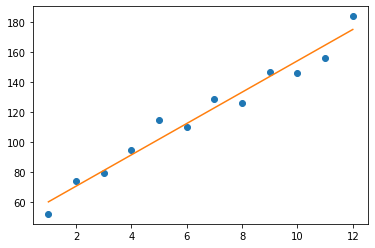

In [28]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

b, m = gradient_descent(months, revenue, 0.01, 1000)

y = [m * x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

***

## Use Your Functions on Real Data

We have constructed a way to find the "best" `b` and `m` values using gradient descent! Let us try this on the set of baseball players' heights and weights that we saw at the beginning of the lesson.

***
### Exercise

1. Run the code in the cell below.

    This is a scatterplot of weight vs height.

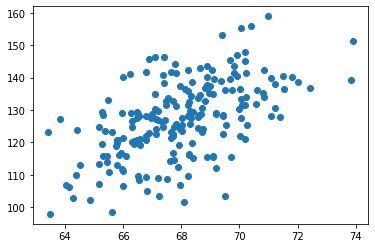

In [29]:
df = pd.read_csv("heights.csv")

x = df["height"]
y = df["weight"]

plt.plot(x, y, 'o')
plt.show()

2. Us the `gradient_descent()` function. Call it with parameters:
    * `x`
    * `y`
    * `learning_rate` of `0.0001`
    * `num_iterations` of `1000`

Store the result in variables called `b` and `m`.

In [30]:
b, m = gradient_descent(x, y, learning_rate=0.0001, num_iterations=1000)

3. Create a list called `y_predictions`. Set it to be every element of `x` multiplied by `m` and added to `b`.

    The easiest way to do this would be a list comprehension:

    `new_y = [element*slope + intercept for element in y]`

In [31]:
y_predictions = [m * x_val + b for x_val in x]

4. Plot `x` vs `y_predictions` on the same plot as the scatterplot.

    Does the line look right?

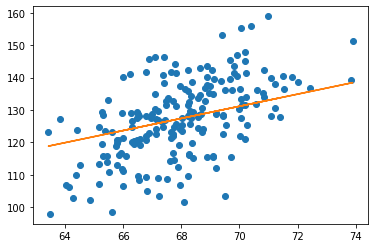

In [32]:
plt.plot(x, y, 'o')
plt.plot(x, y_predictions)

plt.show()

***

## Scikit-Learn

Congratulations! You have now built a linear regression algorithm from scratch.

Luckily, we do not have to do this every time we want to use linear regression. We can use Python's scikit-learn library. Scikit-learn, or `sklearn`, is used specifically for Machine Learning. Inside the `linear_model` module, there is a `LinearRegression()` function we can use:

`from sklearn.linear_model import LinearRegression`

You can first create a `LinearRegression` model, and then fit it to your `x` and `y` data:

`line_fitter = LinearRegression()`
`line_fitter.fit(X, y)`

The `.fit()` method gives the model two variables that are useful to us:

* the `line_fitter.coef_`, which contains the slope
* the `line_fitter.intercept_`, which contains the intercept

We can also use the `.predict()` function to pass in x-values and receive the y-values that this line would predict:

`y_predicted = line_fitter.predict(X)`

**Note:** the `num_iterations` and the `learning_rate` that you learned about in your own implementation have default values within scikit-learn, so you don’t need to worry about setting them specifically!

***
### Exercise

1. We have imported a dataset of soup sales data vs temperature.

    Run the code to see the scatterplot. Can you envision the line that would fit this data?

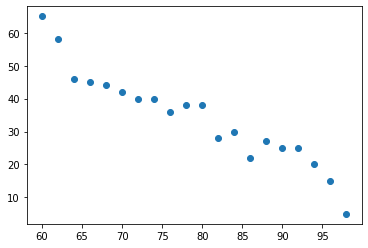

In [33]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')
plt.show()

2. Create an `sklearn` linear regression model and call it `line_fitter`.

In [34]:
line_fitter = LinearRegression()

3. Fit the `line_fitter` object to `temperature` and `sales`.

In [35]:
line_fitter.fit(temperature, sales)

LinearRegression()

4. Create a list called `sales_predict` that is the predicted sales values that `line_fitter` would generate from the `temperature` list.

In [36]:
sales_predict = line_fitter.predict(temperature)

5. Plot `sales_predict` against `temperature` as a line, on the same plot as the scatterplot.

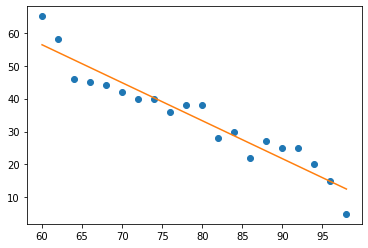

In [37]:
plt.plot(temperature, sales, 'o')
plt.plot(temperature, sales_predict)
plt.show()

***

## Review

We have seen how to implement a linear regression algorithm in Python, and how to use the linear regression model from `scikit-learn`. We learned:

* We can measure how well a line fits by measuring loss.
* The goal of linear regression is to minimize loss.
* To find the line of best fit, we try to find the `b` value (intercept) and the `m` value (slope) that minimize loss.
* *Convergence* refers to when the parameters stop changing with each iteration.
* *Learning* rate refers to how much the parameters are changed on each iteration.
* We can use Scikit-learn's `LinearRegression()` model to perform linear regression on a set of points.

These are important tools to have in your toolkit as you continue your exploration of data science.